In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [3]:
import matplotlib.pyplot as plt

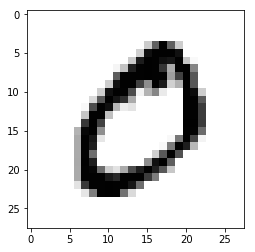

In [6]:
plt.imshow(x_train[1], cmap='gray_r')

In [8]:
x_train.shape

(60000, 28, 28)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
y_train.shape

(60000,)

In [9]:
from keras.utils.np_utils import to_categorical

In [10]:
y_cat_test = to_categorical(y_test, 10)
y_cat_train = to_categorical(y_train, 10)

In [13]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
x_train[0].max()

255

In [18]:
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

In [20]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [22]:
x_train.shape

(60000, 28, 28)

In [23]:
x_train = x_train.reshape(60000,28,28,1)

In [24]:
x_test = x_test.reshape(10000,28,28,1)

In [25]:
from keras.models import Sequential

In [26]:
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [31]:
model = Sequential()

#Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))

#Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))


#2D to 1D
model.add(Flatten())

#Dense Layer
model.add(Dense(128,activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(x_train, y_cat_train, epochs=2)

Epoch 1/2
60000/60000 [==============================] - 199s 3ms/step - loss: 0.1484 - acc: 0.9541
Epoch 2/2
60000/60000 [==============================] - 244s 4ms/step - loss: 0.0490 - acc: 0.9852


In [36]:
model.metrics_names

['loss', 'acc']

In [37]:
model.evaluate(x_test, y_cat_test)

10000/10000 [==============================] - 10s 1ms/step


[0.04244829644939164, 0.9861]

In [38]:
from sklearn.metrics import classification_report

In [39]:
predictions = model.predict_classes(x_test)

In [42]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       1.00      0.99      0.99      1135
          2       0.98      0.99      0.99      1032
          3       0.97      1.00      0.98      1010
          4       0.99      0.98      0.99       982
          5       0.99      0.98      0.98       892
          6       0.99      0.98      0.99       958
          7       0.99      0.98      0.98      1028
          8       0.99      0.97      0.98       974
          9       0.97      0.99      0.98      1009

avg / total       0.99      0.99      0.99     10000



In [52]:
pred = model.predict(x_test)

In [53]:
pred[0]

array([3.0267808e-10, 3.5612668e-10, 1.3411798e-07, 3.7105363e-07,
       1.0312354e-10, 2.5702966e-09, 2.3185483e-15, 9.9999893e-01,
       3.7198260e-09, 5.8909745e-07], dtype=float32)

In [54]:
y_test[0]

7